Looking for some examples on how to use docTR for OCR-related tasks? You've come to the right place 😀

# Installation

Install all the dependencies to make the most out of docTR. The project provides two main [installation](https://mindee.github.io/doctr/latest/installing.html) streams: one for stable release, and developer mode.

# Basic usage

We're going to review the main features of docTR 🎁
And for you to have a proper overview of its capabilities, we will need some free fonts for a proper output visualization:

Let's take care of all the imports directly

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from doctr.io import DocumentFile
from doctr.models import ocr_predictor
import torch
print(torch.cuda.is_available())  # Doit renvoyer True

False


## Basic inference

It looks quite complex, isn't it?
Well that will not prevent you from easily get nice results. See for yourself:

In [2]:
# Download a sample
document_name = "History_of_Business-_1892-_handwritten_notes_(1).pdf"
document_name = "Cash-Payment-Receipt-Template.pdf"
#document_name = "Lettre_Feudataire_abbaye_de_Mercoire.pdf"
#document_name = "COI-handwritten notes.pdf"
doc = DocumentFile.from_pdf("dataset/"+document_name)

In [3]:
from doctr.datasets import VOCABS
vocab = VOCABS["french"]

In [4]:
from doctr.models import vitstr_small
model_path = "/mnt/lustre/scratch/nlsas/home/ulc/cursos/curso341/doctr/vitstr_small_20250426-214813.pt"
reco_model = vitstr_small(pretrained=False, pretrained_backbone=False, vocab=vocab)
reco_params = torch.load(model_path, map_location="cpu")
reco_model.load_state_dict(reco_params)
predictor = ocr_predictor(det_arch="linknet_resnet18", reco_arch=reco_model, pretrained=True)

In [5]:
#from doctr.models import vitstr_small
#reco_model = vitstr_small(pretrained=True, pretrained_backbone=True, vocab=vocab)
#predictor = ocr_predictor(det_arch='db_resnet50', reco_arch=reco_model, pretrained=True)

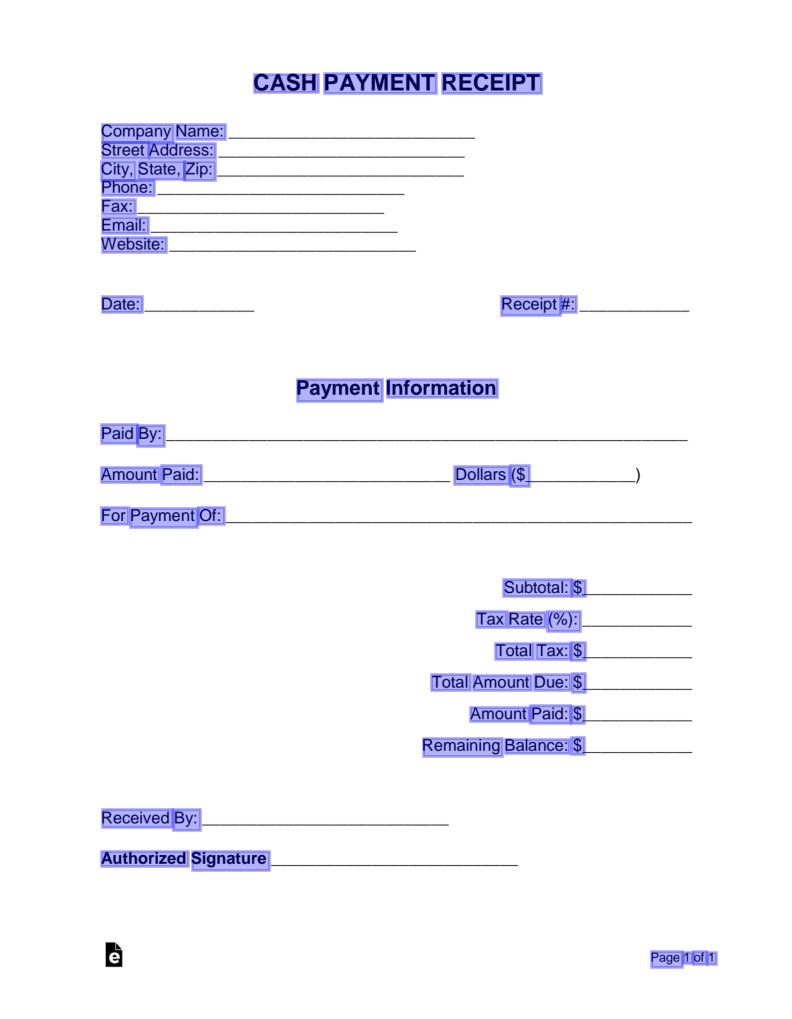

In [6]:
# Déplacer sur GPU si disponible
if torch.cuda.is_available():
    predictor.cuda().half() 
result = predictor(doc)
result.show()

In [7]:
result

Document(
  (pages): [Page(
    dimensions=(1584, 1224)
    (blocks): [Block(
      (lines): [
        Line(
          (words): [
            Word(value='cash', confidence=1.0),
            Word(value='payment', confidence=1.0),
            Word(value='receipt', confidence=1.0),
          ]
        ),
        Line(
          (words): [
            Word(value='company', confidence=1.0),
            Word(value='name:', confidence=1.0),
          ]
        ),
        Line(
          (words): [
            Word(value='street', confidence=1.0),
            Word(value='address:', confidence=1.0),
          ]
        ),
        Line(
          (words): [
            Word(value='city,', confidence=0.99),
            Word(value='state,', confidence=1.0),
            Word(value='zip:', confidence=1.0),
          ]
        ),
        Line(
          (words): [Word(value='phone:', confidence=1.0)]
        ),
        Line(
          (words): [Word(value='fax:', confidence=1.0)]
        ),
        L

Looks accurate!
But we can go further: if the extracted information is correctly structured, we should be able to recreate the page entirely. So let's do this 🎨

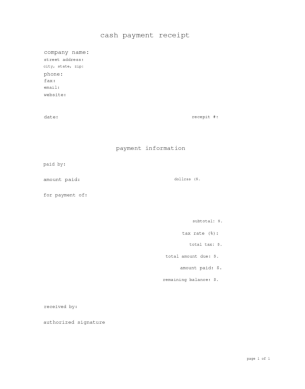

In [8]:
synthetic_pages = result.synthesize()
plt.imshow(synthetic_pages[0]); plt.axis('off'); plt.show()

## Exporting results

OK, so the predictions are relevant, but how would you integrate this into your own document processing pipeline? Perhaps you're not using Python at all?

Well, if you happen to be using JSON or XML exports, they are already supported 🤗

In [9]:
# JSON export
json_export = result.export()
print(json_export)

{'pages': [{'page_idx': 0, 'dimensions': (1584, 1224), 'orientation': {'value': None, 'confidence': None}, 'language': {'value': None, 'confidence': None}, 'blocks': [{'geometry': ((np.float64(0.11707261029411764), np.float64(0.0634765625)), (np.float64(0.9132582720588236), np.float64(0.9580078125))), 'objectness_score': 0.7602822791647028, 'lines': [{'geometry': ((np.float64(0.3154871323529412), np.float64(0.0634765625)), (np.float64(0.6870404411764706), np.float64(0.083984375))), 'objectness_score': 0.8077075680096945, 'words': [{'value': 'cash', 'confidence': 0.9996039867401123, 'geometry': ((np.float64(0.3154871323529412), np.float64(0.064453125)), (np.float64(0.39763327205882354), np.float64(0.0830078125))), 'objectness_score': 0.8713699579238892, 'crop_orientation': {'value': 0, 'confidence': None}}, {'value': 'payment', 'confidence': 0.9998177289962769, 'geometry': ((np.float64(0.4064797794117647), np.float64(0.0634765625)), (np.float64(0.5505514705882353), np.float64(0.08398437

In [10]:
# XML export
xml_output = result.export_as_xml()
print(xml_output[0][0])

b'<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en"><head><title>docTR - XML export (hOCR)</title><meta http-equiv="Content-Type" content="text/html; charset=utf-8" /><meta name="ocr-system" content="python-doctr v0.11.0" /><meta name="ocr-capabilities" content="ocr_page ocr_carea ocr_par ocr_line ocrx_word" /></head><body><div class="ocr_page" id="page_1" title="image; bbox 0 0 1224 1584; ppageno 0" /><div class="ocr_carea" id="block_1" title="bbox 143 101                     1118 1517"><p class="ocr_par" id="par_1" title="bbox 143 101                     1118 1517"><span class="ocr_line" id="line_1" title="bbox 386 101                         841 133;                         baseline 0 0; x_size 0; x_descenders 0; x_ascenders 0"><span class="ocrx_word" id="word_1" title="bbox 386 102                             487 131;                             x_wconf 100">cash</span><span class="ocrx_word" id="word_2" title="bbox 498 101                             674 133;               

Or if you only need the extracted plain text

In [11]:
string_result = result.render()
print(string_result)

cash payment receipt
company name:
street address:
city, state, zip:
phone:
fax:
email:
website:
date:
recepit #:
payment information
paid by:
amount paid:
dollrss ($.
for payment of:
subtotal: $.
tax rate (%):
total tax: $.
total amount due: $.
amount paid: $.
remaining balance: $.
received by:
authorized signature
page 1 of 1
